In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.fft import fft, fft2
sns.set_style(style="darkgrid")

## First Example

In [2]:
n = 500
x = np.arange(0, 4 * math.pi, 4 * math.pi/n)
y = np.sin(x) + np.random.normal(size=n, scale=0.3)
knots = np.arange(0,8 * math.pi, 8 * math.pi/20)

In [3]:
splineTerms = np.array([(x > knot) * (x - knot) for knot in knots]).T
splineTerms = pd.DataFrame(splineTerms)

In [4]:
xMat = pd.DataFrame()
xMat['x'] = x
xMat['1'] = 1

xMat = pd.concat([xMat, splineTerms], axis=1, ignore_index=True)

In [5]:
model_1 = sm.OLS(y, xMat).fit()
model_1.params

0     0.415625
1     0.066503
2     0.415625
3    -1.175282
4    -0.750885
5     0.833066
6     1.047965
7     0.088386
8    -1.191753
9    -0.750303
10    0.782324
11    1.031021
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
dtype: float64

Text(0, 0.5, 'y')

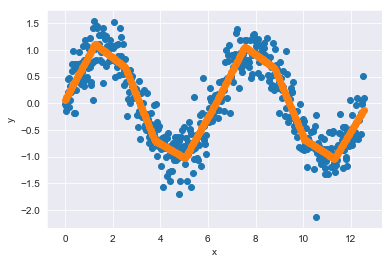

In [6]:
plt.scatter(x,y)
plt.scatter(x, model_1.predict(xMat))
plt.xlabel('x')
plt.ylabel('y')

## Second Example

In [7]:
splineTerms = np.array([(x > knot) * (x - knot) ** 2 for knot in knots]).T
splineTerms = pd.DataFrame(splineTerms)

In [8]:
xMat = pd.DataFrame()

xMat['x'] = x
xMat['x_2'] = x**2
xMat['1'] = 1

xMat = pd.concat([xMat, splineTerms], axis=1, ignore_index=True)

In [9]:
model_2 = sm.OLS(y, xMat).fit()
model_2.params

0     0.914599
1    -0.080331
2     0.074094
3    -0.080331
4    -0.484101
5     0.773182
6     0.298227
7    -0.084892
8    -0.662062
9    -0.174950
10    0.502687
11    0.458681
12   -0.088066
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
dtype: float64

Text(0, 0.5, 'y')

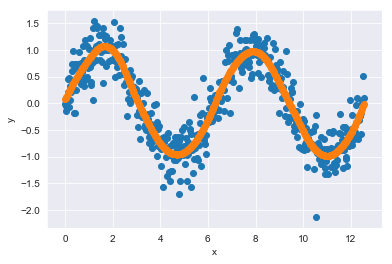

In [10]:
plt.scatter(x, y)
plt.scatter(x, model_2.predict(xMat))
plt.xlabel('x')
plt.ylabel('y')

## Harmonics using linear models

In [11]:
notes4 = [261.63, 293.66, 329.23, 349.23, 392.00, 440.00, 493.88, 523.25]

In [12]:
t = np.arange(0, 2.001, 0.001)
n = len(t)
c4 = np.sin(2 * math.pi * notes4[0] * t)
e4 = np.sin(2 * math.pi * notes4[2] * t)
g4 = np.sin(2 * math.pi * notes4[4] * t)
chord = c4 + e4 + g4 + np.random.normal(size=n, scale=0.3)

In [13]:
n

2001

In [14]:
x = np.array([np.sin(2 * math.pi * freq * t) for freq in notes4]).T

In [15]:
x = pd.DataFrame(x)

In [16]:
model_3 = sm.OLS(chord, x).fit()
model_3.params

0    1.011045
1   -0.003068
2    1.006813
3    0.002641
4    0.999306
5   -0.007933
6    0.024949
7   -0.008500
dtype: float64

Text(0, 0.5, 'Coef^2')

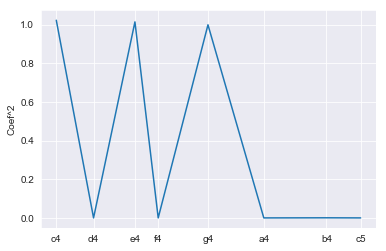

In [17]:
plt.plot(notes4, model_3.params**2)
plt.xticks(notes4, ['c4', 'd4', 'e4', 'f4', 'g4', 'a4', 'b4', 'c5'])
plt.ylabel('Coef^2')

In [18]:
a = np.real(fft(chord)) ** 2 

Text(0, 0.5, 'Re(a)^2')

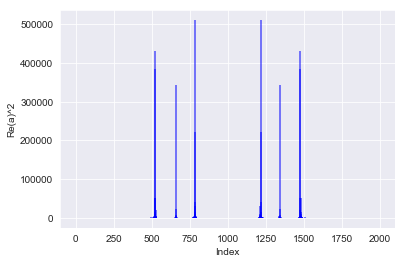

In [19]:
plt.vlines(range(0,len(a)), 0, a, colors='b', lw=2, alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Re(a)^2')